# Convolutional generative adversarial imputation networks for spatio-temporal missing data (Conv-GAIN)
<br>
<li>Authors: Ehsan Adeli, Jize Zhang, Alexandros A. Taflanidis 
<li>Paper: Ehsan Adeli, Jize Zhang, Alexandros A. Taflanidis, "Conv-GAIN: Missing Data Imputation using Convolutional Generative Adversarial Nets for spatio-temporal missing data in storm surge simulations. 26 Nov 2021.<br>
<li>Paper Link: (<a href="https://arxiv.org/abs/2111.02823">Paper</a>)<br>
<li>Contact: Sedeeq.alaa@gmail.com</li><br><br>

<!-- <h4 align="center">Conv-GAIN architecture</h4>
<img src='Conv_GAIN.png'></img><br><br>

<h4 align="center">The Proposed Conv-GAIN architecture</h4>
<img src="Conv_GAIN_layers.png" align="center"></img> -->

## Immport the needed libraries

In [1]:
from tqdm import tqdm 
import numpy as np
from keras.datasets import mnist
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as  plt

from utils.ConvGainUtils import *
from model import ConvGAIN
import pandas as pd

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


## Loading and preprocessing the data

In [2]:
data = pd.read_csv("./data/O3.csv")
del data['Unnamed: 0']

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.035978,0.034749,0.033539,0.032423,0.031472,0.030592,0.029516,0.028957,0.030079,0.032309,...,0.063260,0.065013,0.066024,0.067783,0.070820,0.073832,0.076159,0.077827,0.078992,0.079786
1,0.035577,0.034272,0.032971,0.031768,0.030779,0.029898,0.028408,0.027425,0.029075,0.031558,...,0.063644,0.064818,0.064564,0.066057,0.070305,0.074155,0.076809,0.078574,0.079742,0.080499
2,0.035218,0.033842,0.032451,0.031152,0.030138,0.029400,0.027324,0.026087,0.028208,0.031021,...,0.064092,0.064395,0.061475,0.062454,0.069415,0.074515,0.077532,0.079378,0.080531,0.081239
3,0.034906,0.033468,0.031992,0.030590,0.029544,0.029179,0.027005,0.030972,0.027751,0.030744,...,0.064660,0.063885,0.055547,0.055534,0.068349,0.075018,0.078360,0.080246,0.081359,0.082001
4,0.034644,0.033158,0.031612,0.030113,0.029020,0.029364,0.029707,0.026443,0.027920,0.030662,...,0.065422,0.063789,0.047461,0.045933,0.067847,0.075809,0.079321,0.081185,0.082226,0.082783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572315,0.030375,0.030523,0.027202,0.033708,0.028357,0.026931,0.027138,0.027382,0.026379,0.025179,...,0.017220,0.015143,0.016512,0.026151,0.019855,0.024117,0.019832,0.019271,0.019075,0.019084
572316,0.030540,0.031188,0.030615,0.036814,0.029301,0.027343,0.026976,0.026761,0.026007,0.025074,...,0.018577,0.016545,0.017259,0.019994,0.019833,0.022790,0.019777,0.019296,0.019155,0.019171
572317,0.030615,0.031859,0.038635,0.036147,0.029673,0.027573,0.026876,0.026421,0.025743,0.024956,...,0.019185,0.017357,0.017646,0.018752,0.019435,0.020363,0.019618,0.019305,0.019219,0.019250
572318,0.030549,0.031754,0.034901,0.033527,0.029527,0.027632,0.026786,0.026200,0.025545,0.024837,...,0.019071,0.017899,0.017941,0.018543,0.019131,0.019600,0.019455,0.019309,0.019277,0.019326


In [4]:
data = np.asarray(data)
data[0].shape

(28,)

In [5]:
data = np.asarray(data)
print(type(data))
print(data.shape)
data_x = np.reshape(data, (20440,28, 28, 1))
print(np.shape(data_x))
# Parameters
no, rows, cols, _ = data_x.shape

# Introduce missing data
data_x, data_m, mask = data_preprocessor(data_x, 0.1, 28, 28)

<class 'numpy.ndarray'>
(572320, 28)
(20440, 28, 28, 1)


## Training the model

In [6]:
conv_gain_parameters = {'batch_size':256,
                        'hint_rate':0.1,
                        'learning_rate':0.0001,
                        'alpha':0.02,
                        'iterations':100}
with tf.device('/device:GPU:0'):
    imputed_data = ConvGAIN.Conv_GAIN(data_m, conv_gain_parameters)

Epoch(88): D_loss, G_loss ===> 0.315, 0.016: 100%|██████████| 79/79 [00:02<00:00, 33.37it/s]


Epoch(100): D_loss, G_loss ===> 0.333, 0.011: 100%|██████████| 79/79 [00:02<00:00, 31.78it/s]


## Show some random results

Image : 122
rmse :  nan


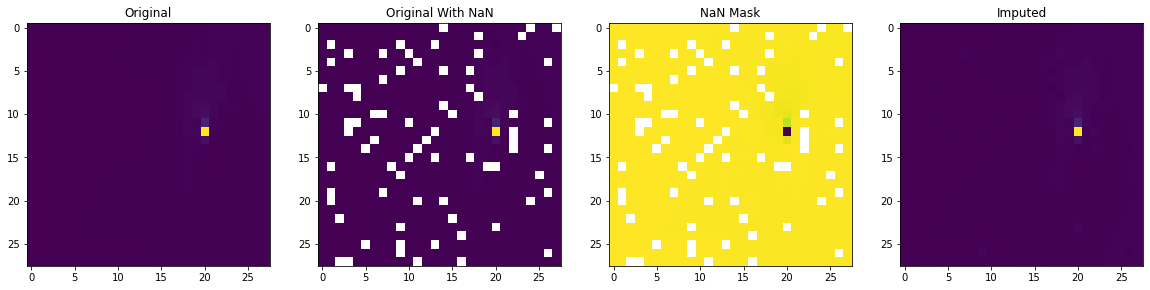

0.6610 sec


In [17]:
import time # time 라이브러리 import
start = time.time()
arr = show_results(data_x, data_m, data_m, imputed_data, num_examples=1)
print(f"{time.time()-start:.4f} sec")

In [8]:
actual, miss, pred= list(arr[0]), list(arr[1]), list(arr[2])

In [9]:
miss2 = pd.DataFrame(miss)
tt = miss2.isnull()
tt = list(np.asarray(tt))
tt_idx = []
for i in range(len(tt)):
    if tt[i]==True:
        tt_idx.append(i)

print(tt_idx)

[14, 27, 42, 43, 57, 69, 73, 74, 76, 92, 102, 127, 128, 137, 179, 182, 184, 193, 196, 200, 201, 207, 209, 246, 247, 257, 260, 281, 284, 297, 300, 301, 303, 304, 308, 319, 328, 333, 338, 341, 342, 354, 356, 366, 390, 398, 400, 414, 422, 432, 435, 439, 452, 492, 503, 523, 527, 530, 541, 548, 552, 579, 595, 604, 610, 612, 613, 627, 644, 671, 672, 686, 758, 764, 768, 781]


In [25]:
re=[]
pr=[]
for i in tt_idx:
    re.append(actual[i])
    pr.append(pred[i])
    print(actual[i],pred[i])

0.05016651 0.07658672305940269
0.08707442 0.03451869677236162
0.05061219 0.04033106348334405
0.056693725 0.04807167855051213
0.036652025 0.07689123782176084
0.04469344 0.0695729685347057
0.06788222 0.058380654079536944
0.07078941 0.09985872135125116
0.058294345 0.0018710691978347817
0.028653521 0.021953339197573623
0.07232306 0.12948690772581792
0.05928472 0.029490025114393782
0.065486535 0.010292091728876886
0.0900562 0.09339192409702503
0.029604647 0.07521656694861292
0.053793535 0.05065372502456451
0.068086855 0.07217364107148291
0.09251785 0.08027085423487011
0.040058482 0.041538624533616106
0.03338131 0.05083249130818911
0.02518218 0.003282881813099753
0.028863393 0.06844374180359088
0.04584137 0.005984947991889673
0.09091681 0.03608841037576114
0.09410754 0.04645128034743505
0.029394638 0.06983580199910684
0.030058362 0.031357436064440185
0.037654355 0.04851010504931978
0.03204849 0.05762907111710834
0.07659354 0.056974634912760364
0.038127325 0.044414618260517284
0.083187245 0.0

In [24]:
len(pred)

784

In [11]:
actual[1]

0.034954466

In [12]:
pred[1]

0.03495446820898069

In [13]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(actual, pred)**0.5

In [14]:
RMSE

0.017055178950871327

In [19]:
# packages
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
#------------------------------------------------------------
# 거리계산 함수
def harvesine(lon1, lat1, lon2, lat2):
    rad = math.pi / 180  # degree to radian
    R = 6378.1  # 지구 평균 반경
    dlon = (lon2 - lon1) * rad
    dlat = (lat2 - lat1) * rad
    a = (math.sin(dlat / 2)) ** 2 + math.cos(lat1 * rad) * \
        math.cos(lat2 * rad) * (math.sin(dlon / 2)) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return(d)
# ------------------------------------------------------------
# 예측 함수
def idwr(x, y, z, xi, yi):
    lstxyzi = []
    for p in range(len(xi)):
        lstdist = []
        for s in range(len(x)):
            d = (harvesine(x[s], y[s], xi[p], yi[p]))
            lstdist.append(d)
        sumsup = list((1 / np.power(lstdist, 2)))
        suminf = np.sum(sumsup)
        sumsup = np.sum(np.array(sumsup) * np.array(z))
        u = sumsup / suminf
        xyzi = [xi[p], yi[p], u]
        lstxyzi.append(xyzi)
    return(lstxyzi)
#prepare

## value
data_test = pd.read_csv("./O3_test.csv")
del data_test['Unnamed: 0']
data_test=np.asarray(data_test)
data_test = data_test.reshape(-1)
data_test.shape
data_test=list(data_test)

## 좌표
a=33
x_1=[]
for i in range(28):
    a=a+0.35714285714285714285714285714286
    x_1.append(a)
b=124
y_1=[]
for i in range(28):
    b=b+0.28571428571428571428571428571429
    y_1.append(b)
    
arr=[]
for i in range(len(y_1)):
    for z in range(len(x_1)):
        arr.append([y_1[i],x_1[z]])
arr = np.asarray(arr)
# Unknown point prepare
x = []
y = []
real_value = []
ff = [14, 27, 42, 43, 57, 69, 73, 74, 76, 92, 102, 127, 128, 137, 179, 182, 184, 193, 196, 200, 201, 207, 209, 246, 247, 257, 260, 281, 284, 297, 300, 301, 303, 304, 308, 319, 328, 333, 338, 341, 342, 354, 356, 366, 390, 398, 400, 414, 422, 432, 435, 439, 452, 492, 503, 523, 527, 530, 541, 548, 552, 579, 595, 604, 610, 612, 613, 627, 644, 671, 672, 686, 758, 764, 768, 781]
for i in ff:
    #y
    y_v=arr[i][0]
    y.append(y_v)
    #x
    x_v=arr[i][1]
    x.append(x_v)
    #z
    z_v = data_test[i]
    real_value.append(z_v)
# kown point prepare
x_i=[]
y_i=[]
z_i=[]
for i in range(len(arr)):
    if i not in ff:
        x_b=arr[i][1]
        y_b=arr[i][0]
        z_b=data_test[i]
        x_i.append(x_b)
        y_i.append(y_b)
        z_i.append(z_b)
print(len(x_i))
print(len(y_i))
print(len(z_i))
x_i = list(x_i)
y_i = list(y_i)
z_i = list(z_i)
x = list(x)
y = list(y)

708
708
708


<h1 align="Center"> Thanks

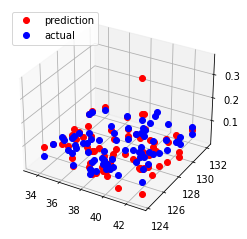

In [28]:
import matplotlib.pyplot as plt
x = np.asarray(x)
y = np.asarray(y)
z = np.asarray(pr)
z_1 = np.asarray(re)
axes = plt.subplot(projection='3d')
axes.plot(x,y,z,"o",label="prediction",color='r')
axes.plot(x,y,z_1,"o",label="actual",color='b')
plt.legend(loc="upper left")
plt.show()